# **Library imports**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# **Data Exploration**

In [ ]:
data=sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
data.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [ ]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
print("Table of characteristics of the categorical variables in the Tips dataset:\n")
data.describe(include=['category'])

Table of characteristics of the categorical variables in the Tips dataset:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
print(data.sex.unique())
print(data.day.unique())
print(data.time.unique())
print(data.smoker.unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']


# **Data visualization**

Unique Values

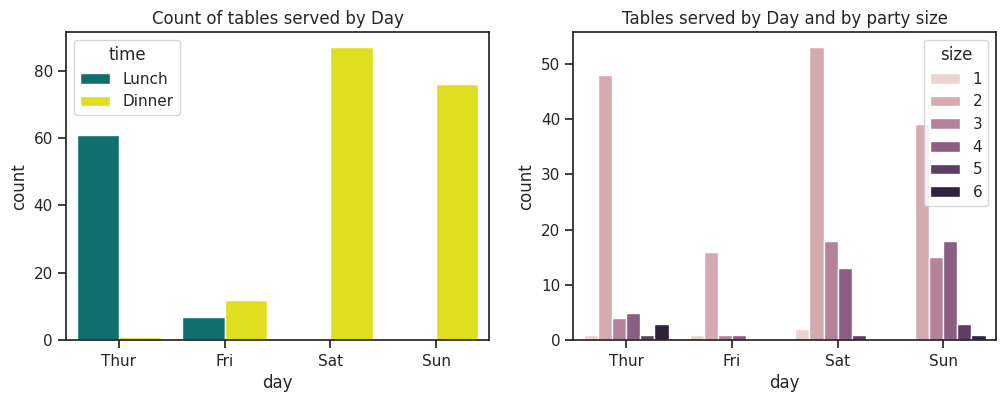

In [ ]:
day_order=["Thur", "Fri", "Sat","Sun"]
sns.set(style="ticks", palette="muted")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

day_order=["Thur", "Fri", "Sat","Sun"]

sns.countplot(x ="day",data =data, hue="time", palette=["teal","yellow"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

sns.countplot(x =("day"), hue="size",data =data, ax=axes[1], order=day_order)
axes[1].set_title("Tables served by Day and by party size");

* Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend.
* The mosy common party size by far is 2. There are very few lone diners and very few parties of 5 and 6.





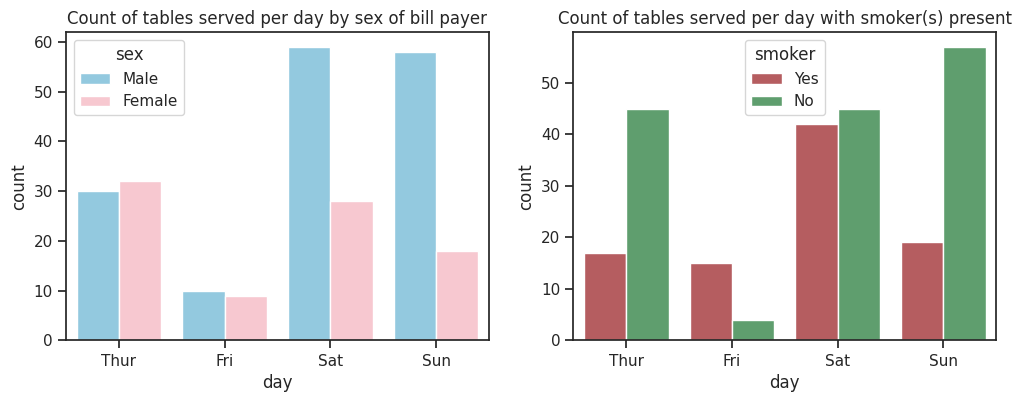

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")

sns.set(style="ticks")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
order=["Thur", "Fri", "Sat","Sun"]

gender_pal=dict(Female="pink",Male="skyblue")
smoker_pal=dict(Yes="r",No="g")

sns.countplot(x ="day", hue="sex", palette=gender_pal,data =data, order=order, ax=axes[0])
axes[0].set_title("Count of tables served per day by sex of bill payer")

sns.countplot(x =("day"), hue="smoker",data =data, ax=axes[1], palette=smoker_pal, order=day_order)
axes[1].set_title("Count of tables served per day with smoker(s) present");



* There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend.
* There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers.
* There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.





<ipython-input-11-2384c3f31b4a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_bill'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
<ipython-input-11-2384c3f31b4a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tip'], kde=True, rug=True, ax=axes[1], color="purple

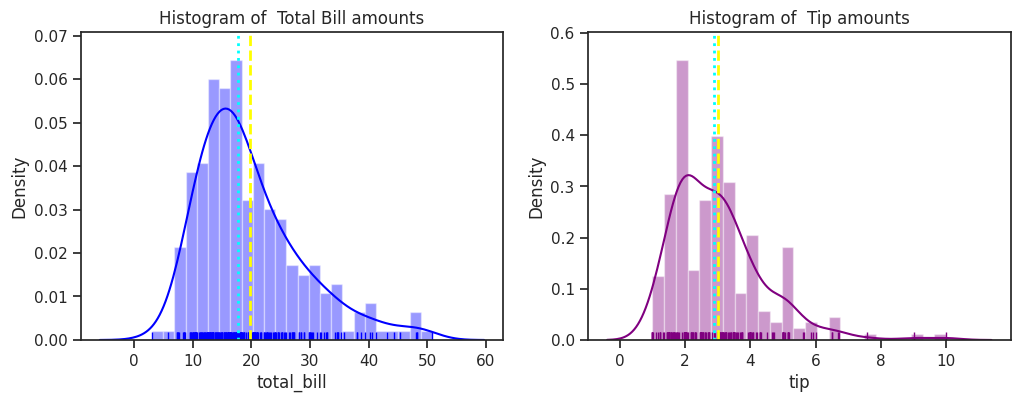

In [ ]:
%matplotlib inline

f, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(data['total_bill'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)

axes[0].axvline(data['total_bill'].mean(), color='yellow', linewidth=2, linestyle="--")

axes[0].axvline(data['total_bill'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")

axes[0].set_title("Histogram of  Total Bill amounts")

sns.distplot(data['tip'], kde=True, rug=True, ax=axes[1], color="purple", bins=25)

axes[1].axvline(data['tip'].mean(), color='yellow', linewidth=2, linestyle="--")

axes[1].axvline(data['tip'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")

axes[1].set_title("Histogram of  Tip amounts");

The histograms show that most total bill amounts fall in the range between 10 and 30 dollars with a peak around 16 dollars. It has only one peak when the default number of bins is used. As more bins are used you would expect to see more peaks in the distribution. The mean is the light yellow line and the median is the broken blue line. As the summary statistics above showed the median total total bill is about 2 dollars less than the mean indicating a non-symmetrical distribution. The mean and median tip amount are very close to each other. The distributions here do look slightly right skewed but you would expect not to see values near zero anyway for total bill amounts. The tips histograms shows that most tips fall in the range between 2 and 4 dollars with two distinct peaks at about 2.50 and 3.50.

The peaks of the kernel density estimates show which values have the highest priobability.

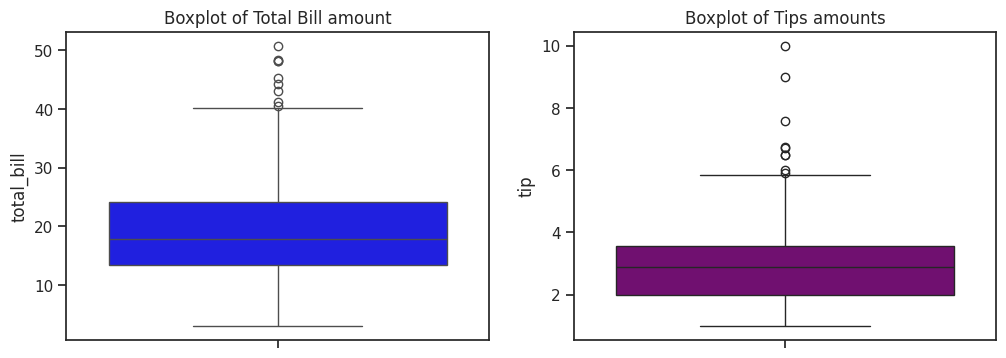

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=data['total_bill'], ax=axes[0], color="blue")

axes[0].set_title("Boxplot of Total Bill amount")
sns.boxplot(y=data['tip'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Tips amounts");

The boxplots above shows similar information on the distribution of total bill and tip amounts as the distribution plots above. The rectangular boxes show the middle half of the distribution. The median bill amount is about 18 and the median tip amount is over 3 dollars. Total bills over 40 represent outliers while tips over 6 dollars are considered outliers. Boxplots can be used to compare distributions, often for one variables at different levels of another variable.

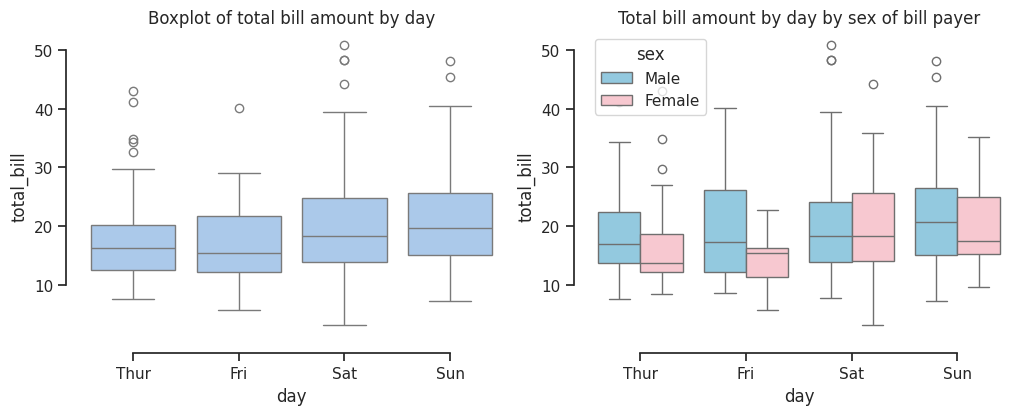

In [ ]:
sns.set(style="ticks", palette="pastel")

f, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 4))

sns.set(style="ticks", palette="muted")
sns.boxplot(x="day",y="total_bill" ,data=data, order=day_order, ax=axes[0])

axes[0].set_title("Boxplot of total bill amount by day")
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=data, palette=gender_pal,order=day_order, ax=axes[1])

axes[1].set_title("Total bill amount by day by sex of bill payer")
sns.despine(offset=10, trim=True);

Looking at the total bill amounts per day shows that the amount spent increases at the weekend and is lowest on a Friday. When broken down by the sex of the bill payer it seems that the median amount spent on the bill is higher for males than females and is also more variable for males. Saturday seems to be the only day when the median bills for males and females are similar although there is more of a right skew on the bill amounts by males.

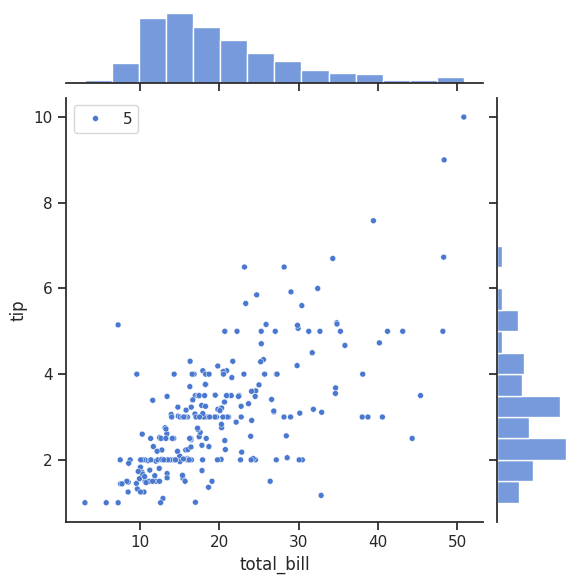

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=data, size=5)

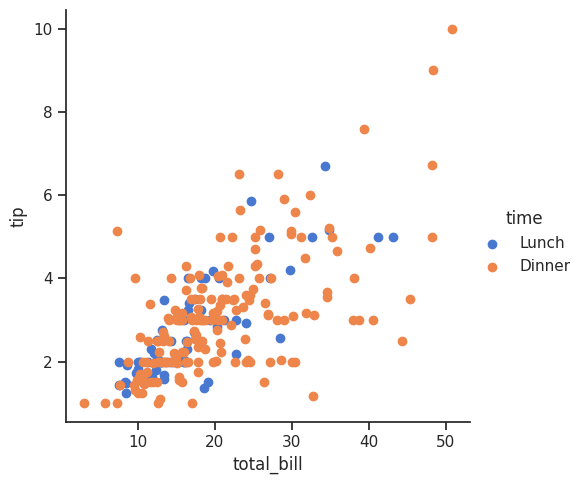

In [ ]:
sns.FacetGrid(data, hue="time", height=5) \
   .map(plt.scatter, "total_bill", "tip") \
   .add_legend()

# **Data Preparation**

In [ ]:
scaler = preprocessing.MinMaxScaler()
data[["tip"]] = scaler.fit_transform(data[["tip"]])
data[["total_bill"]] = scaler.fit_transform(data[["total_bill"]])



In [ ]:
X = data.drop('tip', axis=1)
y = data['tip']

In [ ]:
label_encoders = {}
for col in X.columns:
    if X[col].dtype.name == 'category':
        label = LabelEncoder()
        X[col] = label.fit_transform(X[col])
        label_encoders[col] = label
X.head()

,total_bill,sex,smoker,day,time,size
0,0.291579,0,0,2,0,2
1,0.152283,1,0,2,0,3
2,0.375786,1,0,2,0,3
3,0.431713,1,0,2,0,2
4,0.450775,0,0,2,0,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Regression Analysis**

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.008577937884305773
Mean Absolute Error: 0.07448674996067939
R-squared: 0.44413688261219586


The performance of the model was evaluated using three metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²).

The MSE and MAE were found to be relatively low (MSE: approximately 0.0086, MAE: approximately 0.0745), indicating that on average, the model’s predictions were close to the actual values.

The R-squared value was approximately 0.441, which means around 44.1% of the variance in the dependent variable is predictable from the independent variables.However, an R-squared of 0.441 suggests that there is still a significant amount of variability that is not explained by the model.

In [ ]:
model = Ridge()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.008734959262668986
Mean Absolute Error: 0.07610591499141846
R-squared: 0.43396166403976977


The Ridge Regression model has produced a low MSE and MAE. These low error values indicate that the predictions made by the model are, on average, close to the actual values.

The R-squared value is approximately 0.4339, which is very close to the R-squared of the Linear Regression model.

In [ ]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.018476442428823382
Mean Absolute Error: 0.10621315192743762
R-squared: -0.19730091605265287


The Decision Tree Regressor has produced an MSE and MAE that are greater than those from the previous Linear and Ridge Regression models you've shown, indicating that the average error between the predicted and actual values is higher with this model.

The R-squared value is negative (-0.1973), which is a strong indication that the model is not performing well on the test dataset.Negative R-squared value implies that the model is worse than a simplistic model that only predicts the mean of the dependent variable for all observations.

The Decision Tree may be overfitting to the training data and not generalizing well to unseen data, or it could be that the decision tree structure does not suit the underlying pattern in the data.

# **Summary**

In our project, we have undertaken the task of predicting a continuous target variable using various regression models. We have diligently split our data into training and testing sets to ensure a robust evaluation of our models' performance. In our analysis, we have employed Linear Regression, Ridge Regression, and Decision Tree Regression models.

**Our Choice of Metrics:**

Mean Squared Error (MSE): We chose MSE because it captures the average of the errors squared. We prioritized this metric because in our project, larger errors are more detrimental and we want them to contribute more heavily to the cost we're trying to minimize. This helps us to focus on reducing larger errors in our predictions.

Mean Absolute Error (MAE): We included MAE in our evaluation criteria to get a straightforward average of absolute errors, which gives us a clear idea of the typical error magnitude. This metric is particularly useful because it is not as sensitive to outliers as MSE, allowing us to ensure that a few large errors do not skew our perception of the model's performance.

R-squared (R²): We incorporated R² to assess the proportion of variance in our dependent variable that our models could explain. It's a normalized metric, which is beneficial when we want to compare our model's explanatory power across different contexts or against a baseline model.